<font color="#CA0032"><h1 align="left">**Redes recurrentes profundas**</h1></font>

<font color="#6E6E6E"><h1 align="left">**Predicción de series temporales**</h1></font>

<h2 align="left">Manuel Sánchez-Montañés</h2>

<font color="#6E6E6E"><h2 align="left">manuel.smontanes@gmail.com</h2></font>

**Notebook: Manuel Sánchez-Montañés**

**Adaptación: Francisco Alvarez**

### **Usaremos un esquema many to one:**

<img src="https://drive.google.com/uc?export=download&id=1iokh576AiK2iFhftPogSBsNXixAi-LBg" align="center" style="float" width="500">

In [ ]:
COLAB = True

## <font color="#CA3532"> **Importar librerías**

In [ ]:
import numpy as np
import pandas as pd

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, GRU
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score as R2_score

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import os
import random
import numpy as np
import tensorflow as tf


In [ ]:
SEED = 42  # Usa el número que prefieras para fijar la aleatoriedad

os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
#la ruta ya está con MI Drive

def download_file_from_google_drive(file_id, dest_file, unzip=False):
  aux = "'https://drive.usercontent.google.com/download?id={}&export=download&confirm=t&uuid=9699f0e2-e760-49fc-b12e-49f140095280'".format(file_id)
  !wget $aux -O $dest_file
  if unzip:
    !unzip -qq -o $dest_file
    !rm $dest_file

## <font color="#CA3532"> **Carga de datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# cargamos datos con el fichero df_tienda2_procesado.csv

if COLAB:
    download_file_from_google_drive(file_id='1BA8SPjNHcxTNd83LuXCY-pdpE78RXmkc', dest_file='./datos_pasajeros.csv')

data = pd.read_csv('datos_pasajeros.csv')
data.head(20)

--2025-09-10 21:39:19--  https://drive.usercontent.google.com/download?id=1BA8SPjNHcxTNd83LuXCY-pdpE78RXmkc&export=download&confirm=t&uuid=9699f0e2-e760-49fc-b12e-49f140095280
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 192.178.155.132, 2607:f8b0:4004:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|192.178.155.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43864 (43K) [application/octet-stream]
Saving to: ‘./datos_pasajeros.csv’

./datos_pasajeros.c 100%[===================>]  42.84K  --.-KB/s    in 0.004s  

2025-09-10 21:39:20 (9.45 MB/s) - ‘./datos_pasajeros.csv’ saved [43864/43864]



,day_week,fecha,Sales,is_open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Year_norm,day_year,is_weekend,month,day_month
0,1,2013-01-01,4220.0,1,0,1,1,1,0,0,0.0,1,0,0,1
1,2,2013-01-02,6069.0,1,0,1,0,0,0,0,0.0,2,0,0,2
2,3,2013-01-03,5246.0,1,0,1,0,0,0,0,0.0,3,0,0,3
3,4,2013-01-04,5339.0,1,0,1,0,0,0,0,0.0,4,0,0,4
4,5,2013-01-05,5774.0,1,0,0,0,0,0,0,0.0,5,1,0,5
5,6,2013-01-06,10509.0,1,0,0,0,0,0,0,0.0,6,1,0,6
6,0,2013-01-07,8990.0,1,1,0,0,0,0,0,0.0,7,0,0,7
7,1,2013-01-08,7300.0,1,1,0,0,0,0,0,0.0,8,0,0,8
8,2,2013-01-09,6523.0,1,1,0,0,0,0,0,0.0,9,0,0,9
9,3,2013-01-10,7434.0,1,1,0,0,0,0,0,0.0,10,0,0,10


## <font color="#CA3532"> **Librerías y funciones adicionales**

In [ ]:
# cargamos ya desde MI drive Francisco

if COLAB:
    download_file_from_google_drive(file_id='1TolPCESp9uX4YgU3RctmVwo7hTI3FdqG',
                                    dest_file='./my_utils_series_temporales.py.zip', unzip=True)

--2025-09-10 21:39:20--  https://drive.usercontent.google.com/download?id=1TolPCESp9uX4YgU3RctmVwo7hTI3FdqG&export=download&confirm=t&uuid=9699f0e2-e760-49fc-b12e-49f140095280
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 192.178.155.132, 2607:f8b0:4004:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|192.178.155.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2010 (2.0K) [application/octet-stream]
Saving to: ‘./my_utils_series_temporales.py.zip’

./my_utils_series_t 100%[===================>]   1.96K  --.-KB/s    in 0s      

2025-09-10 21:39:21 (24.3 MB/s) - ‘./my_utils_series_temporales.py.zip’ saved [2010/2010]



In [ ]:
from my_utils_series_temporales import int2dummy, enventanar, info_enventanado, NAN

In [ ]:
def grafica_entrenamiento(tr_mse, val_mse):
    ax=plt.figure(figsize=(10,4)).gca()
    plt.plot(1+np.arange(len(tr_mse)), tr_mse)
    plt.plot(1+np.arange(len(val_mse)), val_mse)
    plt.title('mse del modelo', fontsize=18)
    plt.xlabel('epoca', fontsize=18)
    plt.ylabel('mse', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

## <font color="#CA3532"> **Desarrollo y validación del modelo**

## Definición hiperparámetros

In [ ]:
# VOY A DECLARAR AQUÍ LAS LOS HIPERPARAMETROS QUE VOY A CAMBIAR, los pongo aquí por simplicidad para iterar los 15 experimentos que quiero hacer
neurons_lstm  = 5
dim_embedding = 3
data_window   = 7
batch_size    = 32


In [ ]:
data.shape

(881, 15)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day_week,881.0,3.003405,1.999713,0.0,1.0,3.0,5.0,6.0
Sales,881.0,7260.399546,2275.912174,3215.0,5641.0,6613.0,8065.0,15386.0
is_open,881.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Promo,881.0,0.380250,0.485724,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,881.0,0.182747,0.386678,0.0,0.0,0.0,0.0,1.0
StateHoliday_0,881.0,0.027242,0.162880,0.0,0.0,0.0,0.0,1.0
StateHoliday_a,881.0,0.015891,0.125125,0.0,0.0,0.0,0.0,1.0
StateHoliday_b,881.0,0.006810,0.082291,0.0,0.0,0.0,0.0,1.0
StateHoliday_c,881.0,0.004540,0.067267,0.0,0.0,0.0,0.0,1.0
Year_norm,881.0,0.378547,0.363075,0.0,0.0,0.5,0.5,1.0


Hacemos un poco de Feature Eng. para tener valores de -1 a 1 en varias variables y las de embedding de 0 en adelante

In [ ]:
data["day_month"] = data["day_month"]-1
data["day_month"] = data["day_month"].astype("int32")

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day_week,881.0,3.003405,1.999713,0.0,1.0,3.0,5.0,6.0
Sales,881.0,7260.399546,2275.912174,3215.0,5641.0,6613.0,8065.0,15386.0
is_open,881.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Promo,881.0,0.380250,0.485724,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,881.0,0.182747,0.386678,0.0,0.0,0.0,0.0,1.0
StateHoliday_0,881.0,0.027242,0.162880,0.0,0.0,0.0,0.0,1.0
StateHoliday_a,881.0,0.015891,0.125125,0.0,0.0,0.0,0.0,1.0
StateHoliday_b,881.0,0.006810,0.082291,0.0,0.0,0.0,0.0,1.0
StateHoliday_c,881.0,0.004540,0.067267,0.0,0.0,0.0,0.0,1.0
Year_norm,881.0,0.378547,0.363075,0.0,0.0,0.5,0.5,1.0


In [ ]:
data["fecha"][0]

'2013-01-01'

In [ ]:
data['fecha'] = pd.to_datetime(data['fecha'])

In [ ]:
data.set_index("fecha", inplace=True)

In [ ]:
data.head()

,day_week,Sales,is_open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Year_norm,day_year,is_weekend,month,day_month
fecha,,,,,,,,,,,,,,
2013-01-01,1,4220.0,1,0,1,1,1,0,0,0.0,1,0,0,0
2013-01-02,2,6069.0,1,0,1,0,0,0,0,0.0,2,0,0,1
2013-01-03,3,5246.0,1,0,1,0,0,0,0,0.0,3,0,0,2
2013-01-04,4,5339.0,1,0,1,0,0,0,0,0.0,4,0,0,3
2013-01-05,5,5774.0,1,0,0,0,0,0,0,0.0,5,1,0,4


In [ ]:
print(data.columns)

Index(['day_week', 'Sales', 'is_open', 'Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'Year_norm', 'day_year', 'is_weekend', 'month', 'day_month'],
      dtype='object')


In [ ]:
# Creación de series (arrays)


fechas     = data.index.values
target     = data["Sales"].to_numpy()
mes        = data["month"].to_numpy()     #es categórica y haremos embedding
dow        = data["day_week"].to_numpy()  #es categórica y haremos embedding
day_month  = data["day_month"].to_numpy() #es categórica y haremos embedding
open_      = data["is_open"].to_numpy()
promo      = data["Promo"].to_numpy()
school     = data["SchoolHoliday"].to_numpy()
sh_0       = data["StateHoliday_0"].to_numpy()
sh_a       = data["StateHoliday_a"].to_numpy()
sh_b       = data["StateHoliday_b"].to_numpy()
sh_c       = data["StateHoliday_c"].to_numpy()
is_weekend = data["is_weekend"].to_numpy()
Year_norm  = data["Year_norm"].to_numpy()

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day_week,881.0,3.003405,1.999713,0.0,1.0,3.0,5.0,6.0
Sales,881.0,7260.399546,2275.912174,3215.0,5641.0,6613.0,8065.0,15386.0
is_open,881.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Promo,881.0,0.380250,0.485724,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,881.0,0.182747,0.386678,0.0,0.0,0.0,0.0,1.0
StateHoliday_0,881.0,0.027242,0.162880,0.0,0.0,0.0,0.0,1.0
StateHoliday_a,881.0,0.015891,0.125125,0.0,0.0,0.0,0.0,1.0
StateHoliday_b,881.0,0.006810,0.082291,0.0,0.0,0.0,0.0,1.0
StateHoliday_c,881.0,0.004540,0.067267,0.0,0.0,0.0,0.0,1.0
Year_norm,881.0,0.378547,0.363075,0.0,0.0,0.5,0.5,1.0


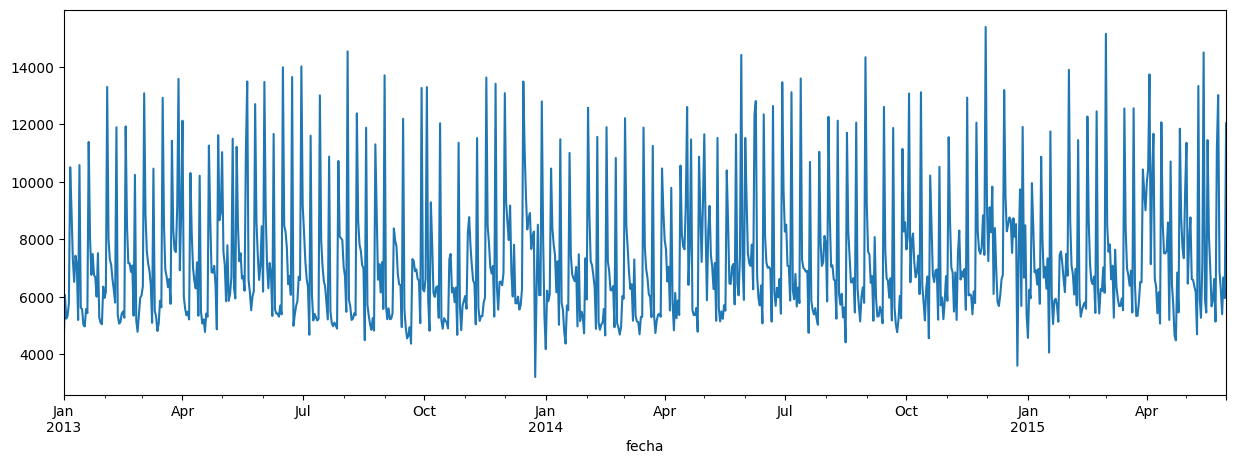

In [ ]:
data["Sales"].plot(figsize=(15,5));

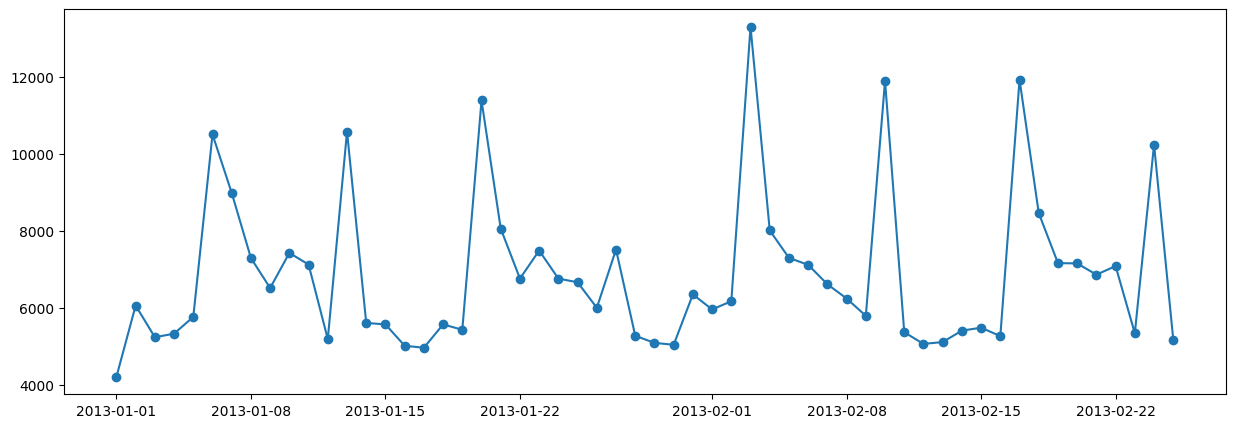

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data["Sales"][:56], "-o");

La tienda anterior era muy diferente
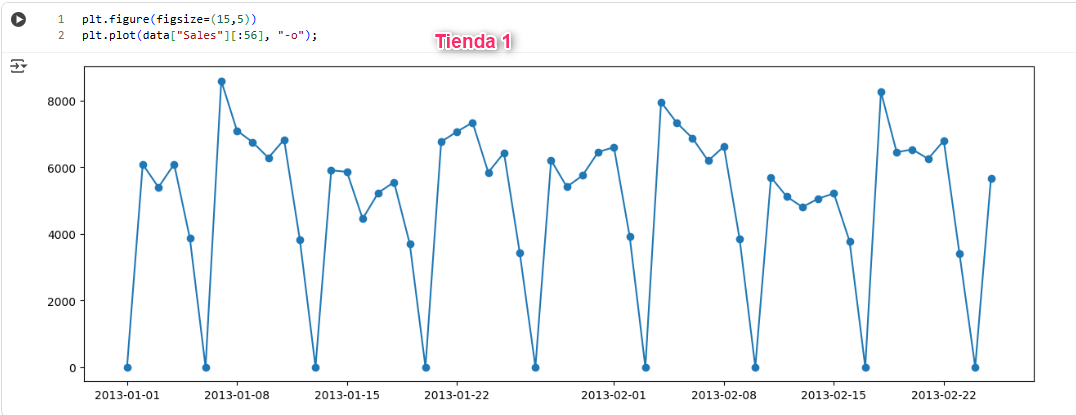

Estas variables las pasaremos a embedding por eso las dejamos mayores que 1

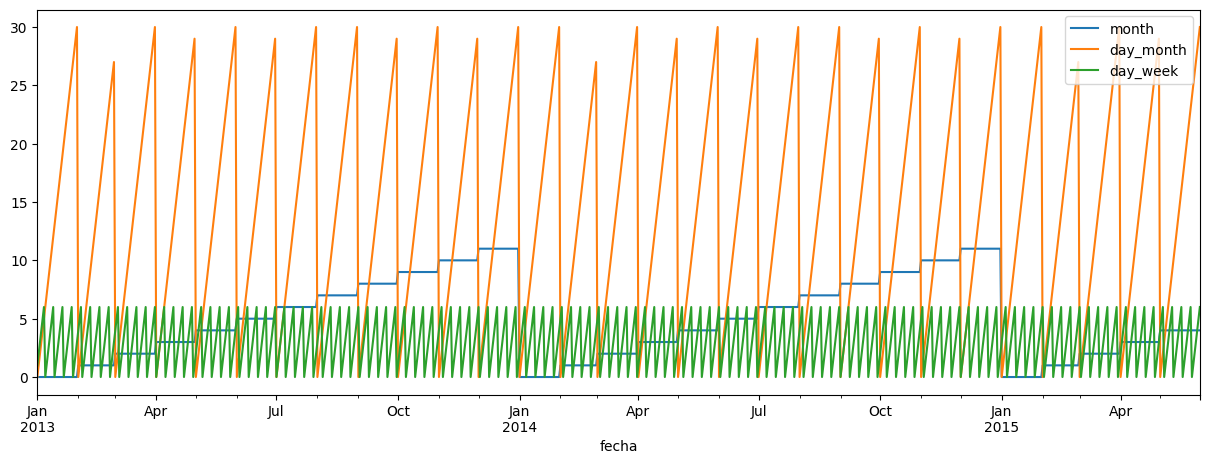

In [ ]:
data[["month", "day_month", "day_week"]].plot(figsize=(15,5));

Declaramos la fecha de corte de train / test para escalar solo con datos de train la variable target = "Sales"

In [ ]:
fecha_corte = data.index[int(0.8*len(data))]
fecha_corte

Timestamp('2014-12-06 00:00:00')

In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data[["Sales"]][:fecha_corte])

MinMaxScaler()

In [ ]:
target_transf = scaler.transform(data[["Sales"]])[:,0]
target_transf[:10]


array([0.08257333, 0.23449182, 0.16687207, 0.17451319, 0.21025388,
       0.5992934 , 0.47448854, 0.33563388, 0.27179361, 0.34664366])

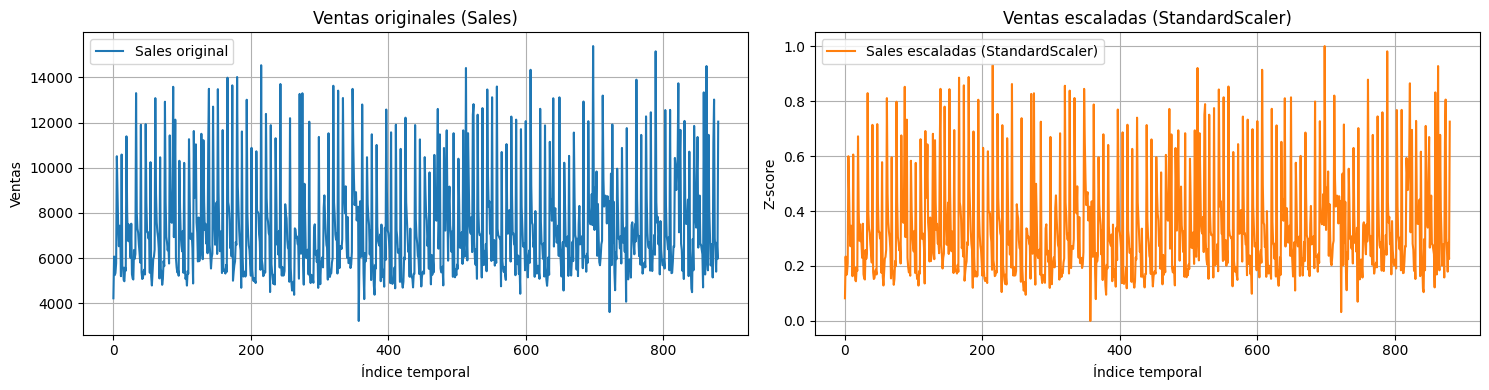

In [ ]:
import matplotlib.pyplot as plt

# Vector original
sales_original = data["Sales"].values

# Vector escalado
sales_scaled = target_transf  # Ya lo has generado con scaler.transform(...)

# Creamos figura
plt.figure(figsize=(15, 4))

# Gráfica original
plt.subplot(1, 2, 1)
plt.plot(sales_original, label="Sales original", color="tab:blue")
plt.title("Ventas originales (Sales)")
plt.xlabel("Índice temporal")
plt.ylabel("Ventas")
plt.grid(True)
plt.legend()

# Gráfica escalada
plt.subplot(1, 2, 2)
plt.plot(sales_scaled, label="Sales escaladas (StandardScaler)", color="tab:orange")
plt.title("Ventas escaladas (StandardScaler)")
plt.xlabel("Índice temporal")
plt.ylabel("Z-score")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print(sales_scaled.min(), sales_scaled.max())

0.0 1.0


In [ ]:
# prueba enventanado

# series univariables a enventanar:
series = [target_transf, open_, dow]
se_saben_antes = [False, True, True]
nombres_series = ["target_transf", "is_open", "day_week"]

data_window # 7,14,28  lookback (tamaño de la ventana PARA PRUEBA más adelante se puede cambiar solo una vez

X, y = enventanar(series,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes, # si adelanto o no 1 día la información
                  W_in=data_window)

In [ ]:
X.shape

(881, 7, 3)

In [ ]:
y.shape

(881,)

In [ ]:
X[5]

array([[       nan,        nan,        nan],
       [       nan, 1.        , 1.        ],
       [0.08257333, 1.        , 2.        ],
       [0.23449182, 1.        , 3.        ],
       [0.16687207, 1.        , 4.        ],
       [0.17451319, 1.        , 5.        ],
       [0.21025388, 1.        , 6.        ]])

In [ ]:
info_enventanado(X[:10], y[:10], nombres_series,
                 nombre_target="target_transf", tiempos=fechas)

10 ventanas creadas

X.shape=(10, 7, 3)  Y.shape=(10,) 

 Ventana 0: 


X[0].shape=(7, 3) 
 
 
   
 ?0 
 ?1 
 ?2 
 ?3 
 ?4 
 ?5 
 ?6 
 
 
 
 
 target_transf 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 is_open 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 1.000000 
 
 
 day_week 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 1.000000 
 
 
 
__
 
 Y[0]=0.0825733300468326 
 
 
   
 2013-01-01 00:00:00 
 
 
 
 
 target_transf 
 0.082573

 Ventana 1: 


X[1].shape=(7, 3) 
 
 
   
 ?0 
 ?1 
 ?2 
 ?3 
 ?4 
 ?5 
 2013-01-01T00:00:00.000000000 
 
 
 
 
 target_transf 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.082573 
 
 
 is_open 
 nan 
 nan 
 nan 
 nan 
 nan 
 1.000000 
 1.000000 
 
 
 day_week 
 nan 
 nan 
 nan 
 nan 
 nan 
 1.000000 
 2.000000 
 
 
 
__
 
 Y[1]=0.23449182482951275 
 
 
   
 2013-01-02 00:00:00 
 
 
 
 
 target_transf 
 0.234492

 Ventana 2: 


X[2].shape=(7, 3) 
 
 
   
 ?0 
 ?1 
 ?2 
 ?3 
 ?4 
 2013-01-01T00:00:00.000000000 
 2013-01-02T00:00:00.000000000 
 
 
 
 
 target_transf 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.082573 
 0.234492 
 
 
 is_open 
 nan 
 nan 
 nan 
 nan 
 1.000000 
 1.000000 
 1.000000 
 
 
 day_week 
 nan 
 nan 
 nan 
 nan 
 1.000000 
 2.000000 
 3.000000 
 
 
 
__
 
 Y[2]=0.16687207296031548 
 
 
   
 2013-01-03 00:00:00 
 
 
 
 
 target_transf 
 0.166872

 Ventana 3: 


X[3].shape=(7, 3) 
 
 
   
 ?0 
 ?1 
 ?2 
 ?3 
 2013-01-01T00:00:00.000000000 
 2013-01-02T00:00:00.000000000 
 2013-01-03T00:00:00.000000000 
 
 
 
 
 target_transf 
 nan 
 nan 
 nan 
 nan 
 0.082573 
 0.234492 
 0.166872 
 
 
 is_open 
 nan 
 nan 
 nan 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 day_week 
 nan 
 nan 
 nan 
 1.000000 
 2.000000 
 3.000000 
 4.000000 
 
 
 
__
 
 Y[3]=0.17451318708405222 
 
 
   
 2013-01-04 00:00:00 
 
 
 
 
 target_transf 
 0.174513

 Ventana 4: 


X[4].shape=(7, 3) 
 
 
   
 ?0 
 ?1 
 ?2 
 2013-01-01T00:00:00.000000000 
 2013-01-02T00:00:00.000000000 
 2013-01-03T00:00:00.000000000 
 2013-01-04T00:00:00.000000000 
 
 
 
 
 target_transf 
 nan 
 nan 
 nan 
 0.082573 
 0.234492 
 0.166872 
 0.174513 
 
 
 is_open 
 nan 
 nan 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 day_week 
 nan 
 nan 
 1.000000 
 2.000000 
 3.000000 
 4.000000 
 5.000000 
 
 
 
__
 
 Y[4]=0.2102538821789499 
 
 
   
 2013-01-05 00:00:00 
 
 
 
 
 target_transf 
 0.210254

 Ventana 5: 


X[5].shape=(7, 3) 
 
 
   
 ?0 
 ?1 
 2013-01-01T00:00:00.000000000 
 2013-01-02T00:00:00.000000000 
 2013-01-03T00:00:00.000000000 
 2013-01-04T00:00:00.000000000 
 2013-01-05T00:00:00.000000000 
 
 
 
 
 target_transf 
 nan 
 nan 
 0.082573 
 0.234492 
 0.166872 
 0.174513 
 0.210254 
 
 
 is_open 
 nan 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 day_week 
 nan 
 1.000000 
 2.000000 
 3.000000 
 4.000000 
 5.000000 
 6.000000 
 
 
 
__
 
 Y[5]=0.599293402349848 
 
 
   
 2013-01-06 00:00:00 
 
 
 
 
 target_transf 
 0.599293

 Ventana 6: 


X[6].shape=(7, 3) 
 
 
   
 ?0 
 2013-01-01T00:00:00.000000000 
 2013-01-02T00:00:00.000000000 
 2013-01-03T00:00:00.000000000 
 2013-01-04T00:00:00.000000000 
 2013-01-05T00:00:00.000000000 
 2013-01-06T00:00:00.000000000 
 
 
 
 
 target_transf 
 nan 
 0.082573 
 0.234492 
 0.166872 
 0.174513 
 0.210254 
 0.599293 
 
 
 is_open 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 day_week 
 1.000000 
 2.000000 
 3.000000 
 4.000000 
 5.000000 
 6.000000 
 0.000000 
 
 
 
__
 
 Y[6]=0.4744885383288143 
 
 
   
 2013-01-07 00:00:00 
 
 
 
 
 target_transf 
 0.474489

 Ventana 7: 


X[7].shape=(7, 3) 
 
 
   
 2013-01-01 00:00:00 
 2013-01-02 00:00:00 
 2013-01-03 00:00:00 
 2013-01-04 00:00:00 
 2013-01-05 00:00:00 
 2013-01-06 00:00:00 
 2013-01-07 00:00:00 
 
 
 
 
 target_transf 
 0.082573 
 0.234492 
 0.166872 
 0.174513 
 0.210254 
 0.599293 
 0.474489 
 
 
 is_open 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 day_week 
 2.000000 
 3.000000 
 4.000000 
 5.000000 
 6.000000 
 0.000000 
 1.000000 
 
 
 
__
 
 Y[7]=0.3356338838222003 
 
 
   
 2013-01-08 00:00:00 
 
 
 
 
 target_transf 
 0.335634

 Ventana 8: 


X[8].shape=(7, 3) 
 
 
   
 2013-01-02 00:00:00 
 2013-01-03 00:00:00 
 2013-01-04 00:00:00 
 2013-01-05 00:00:00 
 2013-01-06 00:00:00 
 2013-01-07 00:00:00 
 2013-01-08 00:00:00 
 
 
 
 
 target_transf 
 0.234492 
 0.166872 
 0.174513 
 0.210254 
 0.599293 
 0.474489 
 0.335634 
 
 
 is_open 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 day_week 
 3.000000 
 4.000000 
 5.000000 
 6.000000 
 0.000000 
 1.000000 
 2.000000 
 
 
 
__
 
 Y[8]=0.2717936077561416 
 
 
   
 2013-01-09 00:00:00 
 
 
 
 
 target_transf 
 0.271794

 Ventana 9: 


X[9].shape=(7, 3) 
 
 
   
 2013-01-03 00:00:00 
 2013-01-04 00:00:00 
 2013-01-05 00:00:00 
 2013-01-06 00:00:00 
 2013-01-07 00:00:00 
 2013-01-08 00:00:00 
 2013-01-09 00:00:00 
 
 
 
 
 target_transf 
 0.166872 
 0.174513 
 0.210254 
 0.599293 
 0.474489 
 0.335634 
 0.271794 
 
 
 is_open 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 day_week 
 4.000000 
 5.000000 
 6.000000 
 0.000000 
 1.000000 
 2.000000 
 3.000000 
 
 
 
__
 
 Y[9]=0.3466436611617779 
 
 
   
 2013-01-10 00:00:00 
 
 
 
 
 target_transf 
 0.346644

In [ ]:
# Lo anterior era una prueba. Ahora voy a enventanar cada
# variable por separado, porque las voy a tratar por separado
# en mi red  podría si quiero poner "en MAYUSC"


series0         = [target_transf]
se_saben_antes0 = [False]
nombres_series0 = ["target_transf"]

X0, y = enventanar(series0,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes0,
                  W_in=data_window)


series1         = [mes]   #cone embedding y 12 categorias
se_saben_antes1 = [True]
nombres_series1 = ["month"]

X1, _ = enventanar(series1,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes1,
                  W_in=data_window)

series2         = [dow]   #con embedding y 7 caterogiras
se_saben_antes2 = [True]
nombres_series2 = ["day_week"]

X2, _ = enventanar(series2,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes2,
                  W_in=data_window)

series3         = [day_month]  # con embedding
se_saben_antes3 = [True]
nombres_series3 = ["day_month"]

X3, _ = enventanar(series3,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes3,
                  W_in=data_window)

series4         = [open_]
se_saben_antes4 = [True]
nombres_series4 = ["open"]

X4, _ = enventanar(series4,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes4,
                  W_in=data_window)

series5         = [promo]
se_saben_antes5 = [True]
nombres_series5 = ["promo"]

X5, _ = enventanar(series5,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes5,
                  W_in=data_window)

series6         = [school]
se_saben_antes6 = [True]
nombres_series6 = ["schoolholiday"]

X6, _ = enventanar(series6,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes6,
                  W_in=data_window)

series7         = [sh_0]
se_saben_antes7 = [True]
nombres_series7 = ["sh_0"]

X7, _ = enventanar(series7,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes7,
                  W_in=data_window)

series8         = [sh_a]
se_saben_antes8 = [True]
nombres_series8 = ["sh_a"]

X8, _ = enventanar(series8,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes8,
                  W_in=data_window)


series9         = [sh_b]
se_saben_antes9 = [True]
nombres_series9 = ["sh_b"]

X9, _ = enventanar(series9,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes9,
                  W_in=data_window)


series10         = [sh_c]
se_saben_antes10 = [True]
nombres_series10 = ["sh_c"]

X10, _ = enventanar(series10,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes10,
                  W_in=data_window)

series11         = [is_weekend]
se_saben_antes11 = [True]
nombres_series11 = ["is_weekend"]

X11, _ = enventanar(series11,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes11,
                  W_in=data_window)

series12        = [Year_norm]
se_saben_antes12 = [True]
nombres_series12 = ["Year_nomb"]

X12, _ = enventanar(series12,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes12,
                  W_in=data_window)

In [ ]:
X0.shape, X1.shape, X2.shape, X3.shape, X4.shape, X5.shape, X6.shape, X7.shape, X8.shape, X9.shape, X10.shape, X11.shape, X12.shape

((881, 7, 1),
 (881, 7, 1),
 (881, 7, 1),
 (881, 7, 1),
 (881, 7, 1),
 (881, 7, 1),
 (881, 7, 1),
 (881, 7, 1),
 (881, 7, 1),
 (881, 7, 1),
 (881, 7, 1),
 (881, 7, 1),
 (881, 7, 1))

In [ ]:
# posición de le fecha de corte dentro de data con index:
fcorte_pos = data.index.to_list().index(fecha_corte)
fcorte_pos

704

# ahora vamos a separar cada una de los vectores de variables en train y test

In [ ]:
target_train = target[data_window:fcorte_pos] # número de Sales
y_train      = y[data_window:fcorte_pos] # número de Sales estandarizados
fechas_train = fechas[data_window:fcorte_pos]

X0_train = X0[data_window:fcorte_pos]
X1_train = X1[data_window:fcorte_pos]
X2_train = X2[data_window:fcorte_pos]
X3_train = X3[data_window:fcorte_pos]
X4_train = X4[data_window:fcorte_pos]
X5_train = X5[data_window:fcorte_pos]
X6_train = X6[data_window:fcorte_pos]
X7_train = X7[data_window:fcorte_pos]
X8_train = X8[data_window:fcorte_pos]
X9_train = X9[data_window:fcorte_pos]
X10_train = X10[data_window:fcorte_pos]
X11_train = X11[data_window:fcorte_pos]
X12_train = X12[data_window:fcorte_pos]


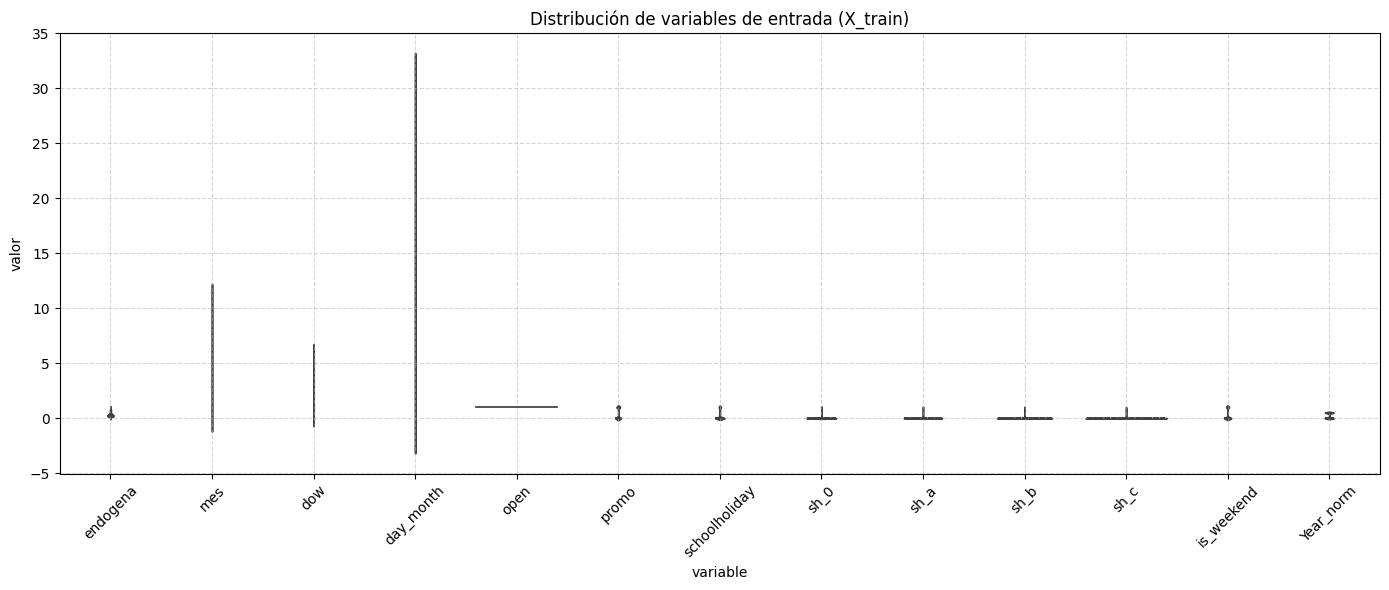

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un diccionario con las variables de entrada
dict_train = {
    "endogena": target_transf,
    "mes": X1_train,
    "dow": X2_train,
    "day_month": X3_train,
    "open": X4_train,
    "promo": X5_train,
    "schoolholiday": X6_train,
    "sh_0": X7_train,
    "sh_a": X8_train,
    "sh_b": X9_train,
    "sh_c": X10_train,
    "is_weekend": X11_train,
    "Year_norm": X12_train
}

# Convertimos a formato largo (long-form)
df_violin = pd.DataFrame()

for name, array in dict_train.items():
    # Aplanamos a 1D si es necesario
    flat_values = array.reshape(-1)
    temp_df = pd.DataFrame({
        "variable": name,
        "valor": flat_values
    })
    df_violin = pd.concat([df_violin, temp_df], ignore_index=True)

# Gráfica tipo violin
plt.figure(figsize=(14, 6))
sns.violinplot(data=df_violin, x="variable", y="valor", inner="quartile")
plt.title("Distribución de variables de entrada (X_train)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
target_test = target[fcorte_pos:] # número de Sales
y_test      = y[fcorte_pos:] # número de Sales estandarizados
fechas_test = fechas[fcorte_pos:]

X0_test = X0[fcorte_pos:]
X1_test = X1[fcorte_pos:]
X2_test = X2[fcorte_pos:]
X3_test = X3[fcorte_pos:]
X4_test = X4[fcorte_pos:]
X5_test = X5[fcorte_pos:]
X6_test = X6[fcorte_pos:]
X7_test = X7[fcorte_pos:]
X8_test = X8[fcorte_pos:]
X9_test = X9[fcorte_pos:]
X10_test = X10[fcorte_pos:]
X11_test = X11[fcorte_pos:]
X12_test = X11[fcorte_pos:]


In [ ]:
X0_train.shape, X1_train.shape, X2_train.shape, X3_train.shape, X4_train.shape, X5_train.shape, X6_train.shape, X7_train.shape, X8_train.shape, X9_train.shape, X10_train.shape, X11_train.shape, X12_train.shape

((697, 7, 1),
 (697, 7, 1),
 (697, 7, 1),
 (697, 7, 1),
 (697, 7, 1),
 (697, 7, 1),
 (697, 7, 1),
 (697, 7, 1),
 (697, 7, 1),
 (697, 7, 1),
 (697, 7, 1),
 (697, 7, 1),
 (697, 7, 1))

In [ ]:
X0_test.shape, X1_test.shape, X2_test.shape, X3_test.shape, X4_test.shape, X5_test.shape, X6_test.shape, X7_test.shape, X8_test.shape, X9_test.shape,
X10_test.shape, X11_test.shape, X12_test.shape

((177, 7, 1), (177, 7, 1), (177, 7, 1))

In [ ]:
fecha_corte

Timestamp('2014-12-06 00:00:00')

# vamos a definir la arquitectura de la red, revisar dimensiones de cada embedding (si es categórico, cuántas categorias tiene)

In [ ]:
from keras.layers import Input, Embedding, concatenate, LSTM, Dense
from keras import Model, optimizers

# data_window = VIENE DEFINIDO DE LA CELDA DE ENVENTANADO
# dim_embedding = 2 y 3  lo cambiamos en la parte de arriba para agilizar las pruebas
# neurons_lstm  de normal se define aquí pero lo he subido para hacer las pruebas
l_r           = 0.0005
opt = optimizers.RMSprop(learning_rate=l_r)

# definimos las entradas
input0 = Input(shape=(data_window, 1),  name="endogena")
input1 = Input(shape=(data_window, ),   name="mes")          #embedding 12categorias
input2 = Input(shape=(data_window, ),   name="dow")          #embedding 7categorias
input3 = Input(shape=(data_window, ),   name="day_month")     #embedding 31categorias
input4 = Input(shape=(data_window,1),    name="open")
input5 = Input(shape=(data_window,1),    name="promo")
input6 = Input(shape=(data_window,1),    name="schoolholiday")
input7 = Input(shape=(data_window,1),    name="sh_0")
input8 = Input(shape=(data_window,1),    name="sh_a")
input9 = Input(shape=(data_window,1),    name="sh_b")
input10 = Input(shape=(data_window,1),   name="sh_c")
input11 = Input(shape=(data_window,1),   name="is_weekend")
input12 = Input(shape=(data_window,1),   name="Year_norm")



#  (embeddings)
embedding1 = Embedding(input_dim=12, output_dim=dim_embedding,
                    input_length=data_window, name="embedding_mes")(input1)


embedding2 = Embedding(input_dim=7,  output_dim=dim_embedding,
                    input_length=data_window, name="embedding_dow")(input2)

embedding3 = Embedding(input_dim=31, output_dim=dim_embedding,
                    input_length=data_window, name="embedding_day_month")(input3)

# Concatenación 3D por eje de features
x = concatenate([input0, embedding1, embedding2, embedding3, input4, input5, input6, input7, input8,input9, input10, input11, input12 ])  # -> (N, W, 1+1+1+2+2)

x = LSTM(units=neurons_lstm)(x)
out = Dense(units=1)(x)



model = Model(inputs=[input0, input1, input2, input3, input4, input5, input6, input7, input8, input9, input10, input11, input12], outputs=out)
model.compile(loss="mean_squared_error", optimizer=opt, metrics=["mae"])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ mes (InputLayer)    │ (None, 7)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dow (InputLayer)    │ (None, 7)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ day_month           │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ endogena            │ (None, 7, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_mes       │ (None, 7, 3)      │         36 │ mes[0][0]         │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_dow       │ (None, 7, 3)      │         21 │ dow[0][0]         │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_day_month │ (None, 7, 3)      │         93 │ day_month[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ open (InputLayer)   │ (None, 7, 1)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ promo (InputLayer)  │ (None, 7, 1)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ schoolholiday       │ (None, 7, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sh_0 (InputLayer)   │ (None, 7, 1)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sh_a (InputLayer)   │ (None, 7, 1)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sh_b (InputLayer)   │ (None, 7, 1)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sh_c (InputLayer)   │ (None, 7, 1)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ is_weekend          │ (None, 7, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Year_norm           │ (None, 7, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_16      │ (None, 7, 19)     │          0 │ endogena[0][0],   │
│ (Concatenate)       │                   │            │ embedding_mes[0]… │
│                     │                   │            │ embedding_dow[0]… │
│                     │                   │            │ embedding_day_mo… │
│                     │                   │            │ open[0][0],       │
│                     │                   │            │ promo[0][0],      │
│                     │                   │            │ schoolholiday[0]… │
│                     │                   │            │ sh_0[0][0],       │
│                     │                   │            │ sh_a[0][0],     

 Total params: 656 (2.56 KB)

 Trainable params: 656 (2.56 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
for t in model.inputs:
    print(t.name, t.shape)


endogena (None, 7, 1)
mes (None, 7)
dow (None, 7)
day_month (None, 7)
open (None, 7, 1)
promo (None, 7, 1)
schoolholiday (None, 7, 1)
sh_0 (None, 7, 1)
sh_a (None, 7, 1)
sh_b (None, 7, 1)
sh_c (None, 7, 1)
is_weekend (None, 7, 1)
Year_norm (None, 7, 1)


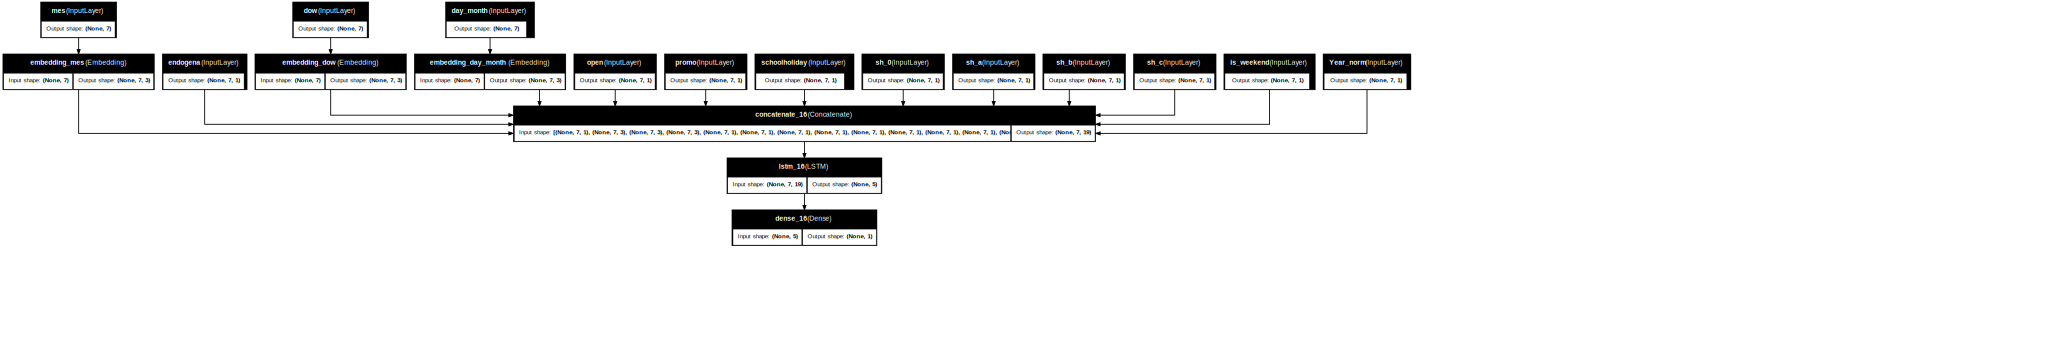

In [ ]:
from IPython.display import SVG
from keras.utils import model_to_dot

if COLAB:
  display(SVG(model_to_dot(model, show_shapes=True, dpi=50).create(prog="dot",
                                                                   format="svg")))
else:
  display(SVG(model_to_dot(model, show_shapes=True).create(prog="dot",
                                                           format="svg")))

# Parámetros para el entrenamiento

In [ ]:
epochs = 250
# batch_size = 32 y 64 lo definimos arriba para hacer varias iteraciones y facilitar las pruebas
Nval = 200 # los 200 últimos días de training los voy a usar como validación

X0_tr = X0_train[:-Nval]
X1_tr = X1_train[:-Nval]
X2_tr = X2_train[:-Nval]
X3_tr = X3_train[:-Nval]
X4_tr = X4_train[:-Nval]
X5_tr = X5_train[:-Nval]
X6_tr = X6_train[:-Nval]
X7_tr = X7_train[:-Nval]
X8_tr = X8_train[:-Nval]
X9_tr = X9_train[:-Nval]
X10_tr = X10_train[:-Nval]
X11_tr = X11_train[:-Nval]
X12_tr = X12_train[:-Nval]
y_tr  = y_train[:-Nval]

X0_va = X0_train[-Nval:]
X1_va = X1_train[-Nval:]
X2_va = X2_train[-Nval:]
X3_va = X3_train[-Nval:]
X4_va = X4_train[-Nval:]
X5_va = X5_train[-Nval:]
X6_va = X6_train[-Nval:]
X7_va = X7_train[-Nval:]
X8_va = X8_train[-Nval:]
X9_va = X9_train[-Nval:]
X10_va = X10_train[-Nval:]
X11_va = X11_train[-Nval:]
X12_va = X12_train[-Nval:]
y_va  = y_train[-Nval:]

In [ ]:
#Creación de diccionarios
tr_loss_history = []
va_loss_history = []

modelpath = "best_model.h5" # fichero en el que guardaré el mejor modelo
checkpoint = ModelCheckpoint(modelpath, monitor="val_loss", verbose=2, save_best_only=True)

Xs_tr = {
    "endogena":   X0_tr,
    "mes":        X1_tr,
    "dow":        X2_tr,
    "day_month":  X3_tr,
    "open":       X4_tr,
    "promo":      X5_tr,
    "schoolholiday": X6_tr,
    "sh_0":       X7_tr,
    "sh_a":       X8_tr,
    "sh_b":       X9_tr,
    "sh_c":       X10_tr,
    "is_weekend": X11_tr,
    "Year_norm":  X12_tr
}

Xs_va = {
    "endogena": X0_va,
    "mes": X1_va,
    "dow": X2_va,
    "day_month": X3_va,
    "open": X4_va,
    "promo": X5_va,
    "schoolholiday": X6_va,
    "sh_0": X7_va,
    "sh_a": X8_va,
    "sh_b": X9_va,
    "sh_c": X10_va,
    "is_weekend": X11_va,
    "Year_norm": X12_va
}

Xs_test = {
    "endogena": X0_test,
    "mes": X1_test,
    "dow": X2_test,
    "day_month": X3_test,
    "open": X4_test,
    "promo": X5_test,
    "schoolholiday": X6_test,
    "sh_0": X7_test,
    "sh_a": X8_test,
    "sh_b": X9_test,
    "sh_c": X10_test,
    "is_weekend": X11_test,
    "Year_norm": X12_test
}


Epoch 1: val_loss improved from inf to 0.24609, saving model to best_model.h5


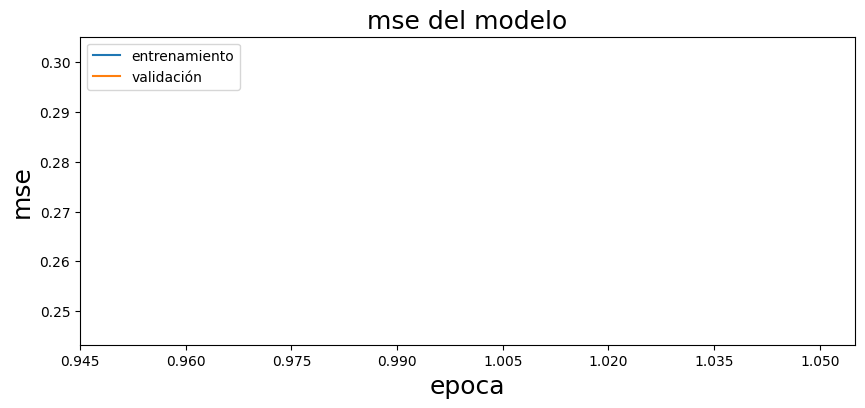

Parámetros: window_size=7, Neuronas=5, batch_size=32, dim_embedding=3

Epoch 1: val_loss improved from 0.24609 to 0.14452, saving model to best_model.h5



Epoch 1: val_loss improved from 0.14452 to 0.08292, saving model to best_model.h5



Epoch 1: val_loss improved from 0.08292 to 0.05365, saving model to best_model.h5



Epoch 1: val_loss improved from 0.05365 to 0.04351, saving model to best_model.h5



Epoch 1: val_loss improved from 0.04351 to 0.04006, saving model to best_model.h5



Epoch 1: val_loss improved from 0.04006 to 0.03824, saving model to best_model.h5



Epoch 1: val_loss improved from 0.03824 to 0.03685, saving model to best_model.h5



Epoch 1: val_loss improved from 0.03685 to 0.03563, saving model to best_model.h5



Epoch 1: val_loss improved from 0.03563 to 0.03450, saving model to best_model.h5



Epoch 1: val_loss improved from 0.03450 to 0.03343, saving model to best_model.h5



Epoch 1: val_loss improved from 0.03343 to 0.03241, saving model to best_model.h5



Epoch 1: val_loss improved from 0.03241 to 0.03143, saving model to best_model.h5



Epoch 1: val_loss improved from 0.03143 to 0.03048, saving model to best_model.h5



Epoch 1: val_loss improved from 0.03048 to 0.02958, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02958 to 0.02871, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02871 to 0.02788, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02788 to 0.02711, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02711 to 0.02638, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02638 to 0.02569, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02569 to 0.02505, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02505 to 0.02444, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02444 to 0.02386, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02386 to 0.02329, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02329 to 0.02274, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02274 to 0.02219, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02219 to 0.02165, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02165 to 0.02110, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02110 to 0.02054, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02054 to 0.01998, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01998 to 0.01942, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01942 to 0.01885, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01885 to 0.01828, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01828 to 0.01771, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01771 to 0.01715, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01715 to 0.01660, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01660 to 0.01605, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01605 to 0.01552, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01552 to 0.01501, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01501 to 0.01451, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01451 to 0.01404, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01404 to 0.01359, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01359 to 0.01316, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01316 to 0.01276, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01276 to 0.01239, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01239 to 0.01204, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01204 to 0.01173, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01173 to 0.01144, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01144 to 0.01118, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01118 to 0.01094, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01094 to 0.01073, saving model to best_model.h5


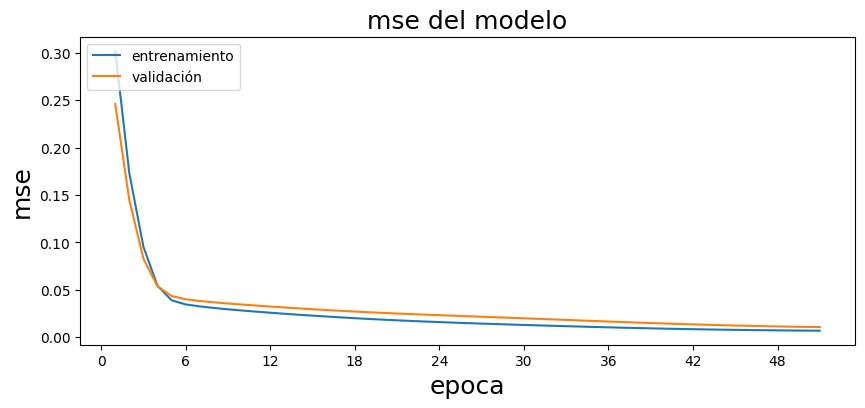

Parámetros: window_size=7, Neuronas=5, batch_size=32, dim_embedding=3

Epoch 1: val_loss improved from 0.01073 to 0.01054, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01054 to 0.01036, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01036 to 0.01021, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01021 to 0.01007, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01007 to 0.00995, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00995 to 0.00983, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00983 to 0.00973, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00973 to 0.00964, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00964 to 0.00956, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00956 to 0.00948, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00948 to 0.00941, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00941 to 0.00935, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00935 to 0.00929, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00929 to 0.00924, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00924 to 0.00919, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00919 to 0.00915, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00915 to 0.00910, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00910 to 0.00907, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00907 to 0.00903, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00903 to 0.00900, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00900 to 0.00897, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00897 to 0.00894, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00894 to 0.00892, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00892 to 0.00889, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00889 to 0.00887, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00887 to 0.00885, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00885 to 0.00884, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00884 to 0.00882, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00882 to 0.00881, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00881 to 0.00879, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00879 to 0.00878, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00878 to 0.00877, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00877 to 0.00876, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00876 to 0.00875, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00875 to 0.00874, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00874 to 0.00874, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00874 to 0.00873, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00873 to 0.00873, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00873 to 0.00873, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00873 to 0.00872, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00872 to 0.00872, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00872 to 0.00872, saving model to best_model.h5



Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872


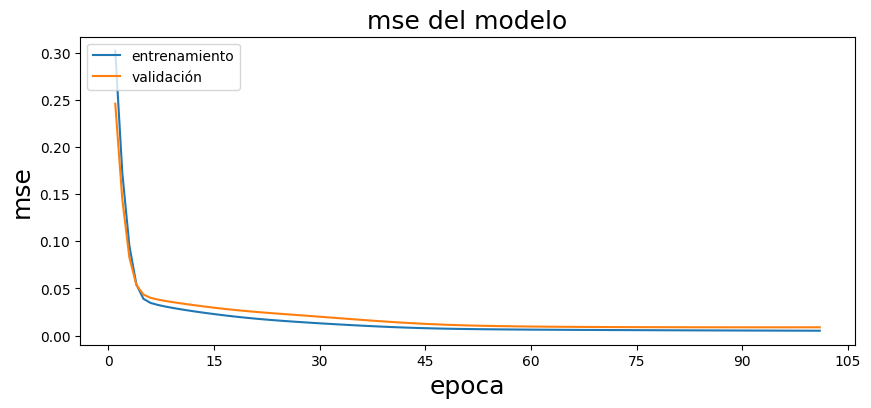

Parámetros: window_size=7, Neuronas=5, batch_size=32, dim_embedding=3

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss

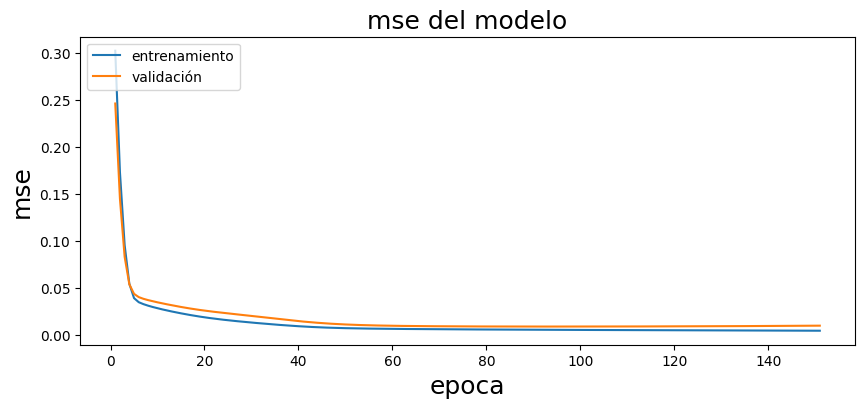

Parámetros: window_size=7, Neuronas=5, batch_size=32, dim_embedding=3

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss

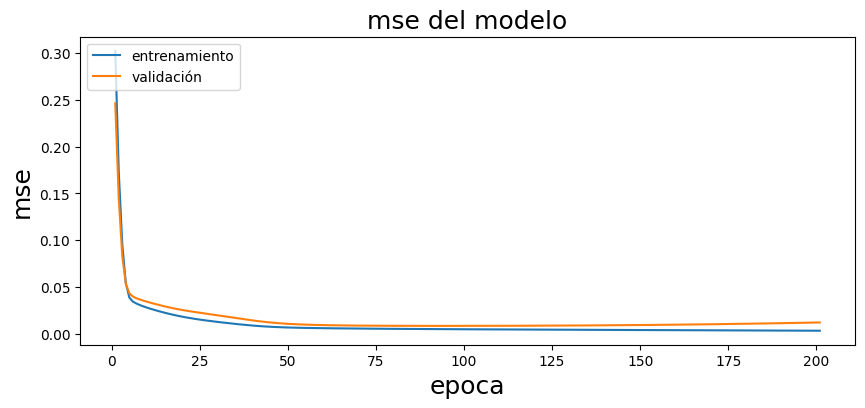

Parámetros: window_size=7, Neuronas=5, batch_size=32, dim_embedding=3

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss did not improve from 0.00872

Epoch 1: val_loss

In [ ]:
for e in range(epochs):
  history = model.fit(Xs_tr, y_tr, batch_size=batch_size, epochs=1,
                      callbacks=[checkpoint], verbose=0, validation_data=(Xs_va, y_va))
  tr_loss_history += history.history["loss"]
  va_loss_history += history.history["val_loss"]
  if e%50 == 0:
    grafica_entrenamiento(tr_loss_history, va_loss_history)
    print(f"Parámetros: window_size={data_window}, Neuronas={neurons_lstm}, batch_size={batch_size}, dim_embedding={dim_embedding}")


In [ ]:
model = load_model(modelpath)

In [ ]:
y_tr_prediction = model.predict(Xs_tr, verbose=0)

In [ ]:
y_va_prediction = model.predict(Xs_va, verbose=0)

In [ ]:
y_test_prediction = model.predict(Xs_test, verbose=0)

In [ ]:
target_tr_pred = scaler.inverse_transform(y_tr_prediction).flatten() # des-estandarización de Sales
target_va_pred = scaler.inverse_transform(y_va_prediction).flatten()
target_test_pred = scaler.inverse_transform(y_test_prediction).flatten()

In [ ]:
# antes separé y_train en y_tr e y_va (estandarizados),
# pero no hice lo mismo con target_train (sin estandarizar)
# Ahora lo hago:
fechas_tr = fechas_train[:len(y_tr)]
fechas_va = fechas_train[len(y_tr):]
target_tr = target_train[:len(y_tr)]
target_va = target_train[len(y_tr):]

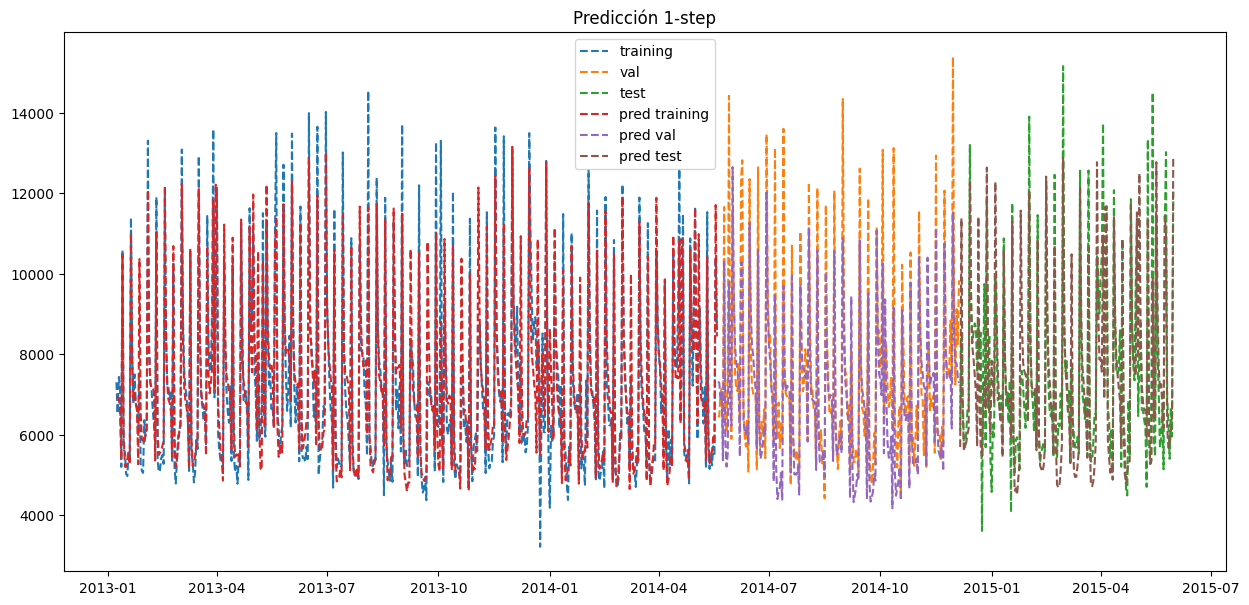

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(fechas_tr, target_tr, '--', label="training")
plt.plot(fechas_va, target_va, '--', label="val")
plt.plot(fechas_test, target_test, '--', label="test")
plt.plot(fechas_tr, target_tr_pred, '--', label="pred training")
plt.plot(fechas_va, target_va_pred, '--', label="pred val")
plt.plot(fechas_test, target_test_pred, '--', label="pred test")
plt.legend()
plt.title("Predicción 1-step");

In [ ]:
!cal 9 2016

/bin/bash: line 1: cal: command not found


In [ ]:
fechas_test[0]

np.datetime64('2014-12-06T00:00:00.000000000')

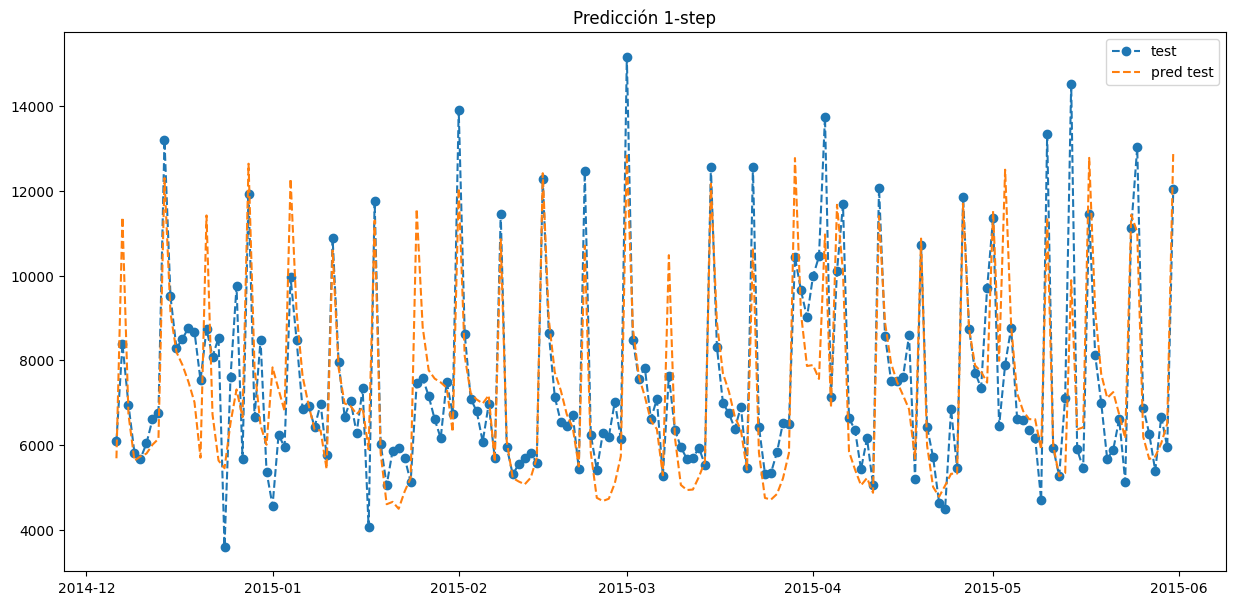

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(fechas_test, target_test, '--o', label="test")
plt.plot(fechas_test, target_test_pred, '--', label="pred test")
plt.legend()
plt.title("Predicción 1-step");

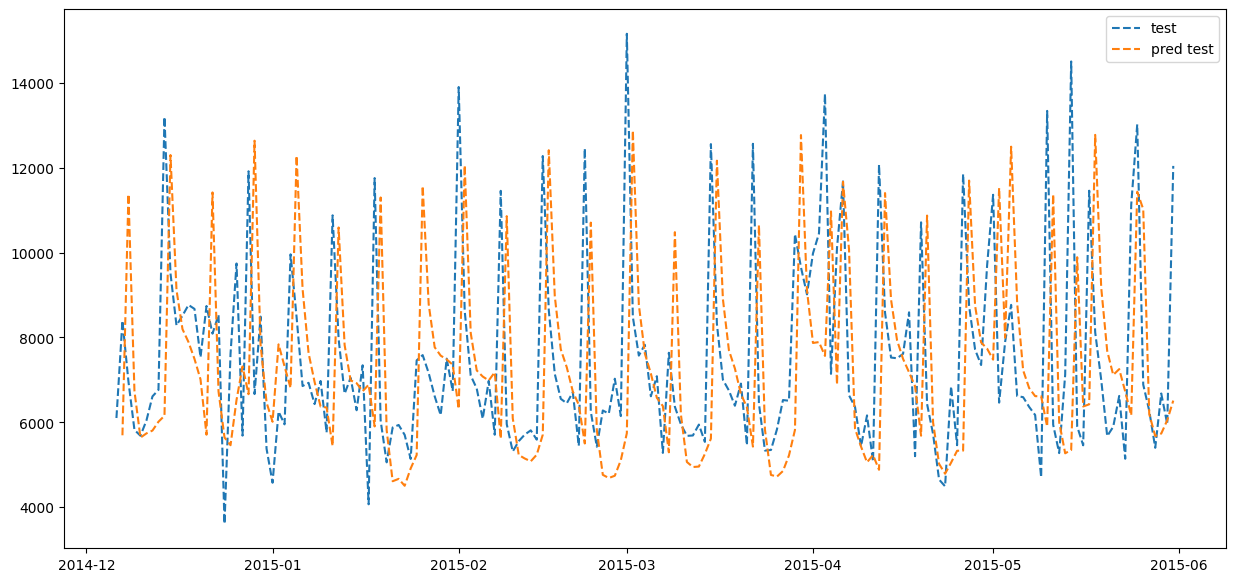

In [ ]:
# esto es lo que daría si el modelo no tuviera ni idea (predice mañana lo mismo que hoy, "MODELO PERSISTENTE A 1 DÍA")

plt.figure(figsize=(15,7))
plt.plot(fechas_test, target_test, '--', label="test")
plt.plot(fechas_test[1:], target_test_pred[:-1], '--', label="pred test")
plt.legend();

In [ ]:
R2_va = R2_score(target_tr, target_tr_pred)
R2_tr = R2_score(target_va, target_va_pred)
R2_ts = R2_score(target_test, target_test_pred)
print("R2 en training: {}".format(R2_tr))
print("R2 en val: {}".format(R2_va))
print("R2 en test: {}".format(R2_ts))

R2 en training: 0.7534166246902424
R2 en val: 0.8514232080210755
R2 en test: 0.7144683924489912


In [ ]:
from sklearn.metrics import mean_squared_error as MSE

MSE_tr = MSE(target_tr, target_tr_pred)
MSE_va = MSE(target_va, target_va_pred)
MSE_ts = MSE(target_test, target_test_pred)
print("MSE en training: {}".format(MSE_tr))
print("MSE en val: {}".format(MSE_va))
print("MSE en test: {}".format(MSE_ts))

MSE en training: 751717.2411995922
MSE en val: 1292020.4871473098
MSE en test: 1506914.3026973433


R2 en test de modelo persistente a 1 días: -0.7297481481103707
R2 en test de modelo persistente a 2 días: -1.0503600708788143
R2 en test de modelo persistente a 3 días: -1.1376551327307722
R2 en test de modelo persistente a 4 días: -1.136406309017504
R2 en test de modelo persistente a 5 días: -1.1634898501712807
R2 en test de modelo persistente a 6 días: -1.278286408601275
R2 en test de modelo persistente a 7 días: 0.038043627713843176
R2 en test de modelo persistente a 8 días: -1.1037122993381594
R2 en test de modelo persistente a 9 días: -1.2764383068675045
R2 en test de modelo persistente a 10 días: -1.317405200944978
R2 en test de modelo persistente a 11 días: -1.117077682229453
R2 en test de modelo persistente a 12 días: -0.9968708424028376
R2 en test de modelo persistente a 13 días: -0.9923042412215441
R2 en test de modelo persistente a 14 días: 0.31244528606971844
R2 en test de modelo persistente a 15 días: -0.817070767829311
R2 en test de modelo persistente a 16 días: -1.043514

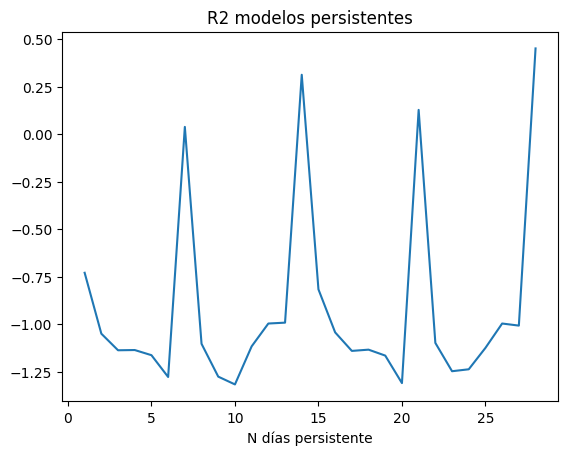

In [ ]:
# Extraigo métricas de diferentes modelos persistentes a N días:

R2_persistentes = []
rango = range(1, 4*7+1)
for i in rango:
  score = R2_score(target_test[i:], target_test_pred[:-i])
  R2_persistentes.append(score)
  print("R2 en test de modelo persistente a {} días: {}".format(i, score))

plt.plot(rango, R2_persistentes)
plt.title("R2 modelos persistentes")
plt.xlabel("N días persistente");

In [ ]:
embeddings_mes = model.get_layer("embedding_mes").get_weights()[0]
embeddings_mes.shape

(12, 3)

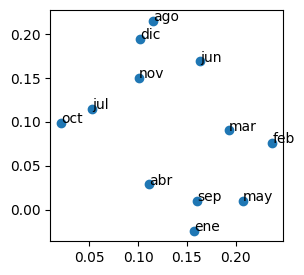

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(embeddings_mes[:,0], embeddings_mes[:,1], "o")
nombres = ["ene","feb","mar","abr","may","jun","jul","ago","sep","oct","nov","dic"]
for coords,nombre in zip(embeddings_mes,nombres):
  plt.text(coords[0],coords[1],nombre)

In [ ]:
embeddings_dow = model.get_layer("embedding_dow").get_weights()[0]
embeddings_dow.shape

(7, 3)

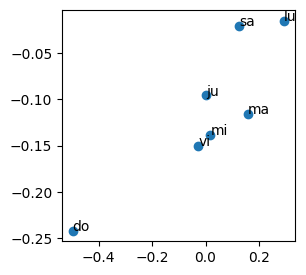

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(embeddings_dow[:,0], embeddings_dow[:,1], "o")
nombres = ["lu","ma","mi","ju","vi","sa","do"]
for coords,nombre in zip(embeddings_dow,nombres):
  plt.text(coords[0],coords[1],nombre)

In [ ]:
embeddings_day_month = model.get_layer("embedding_day_month").get_weights()[0]
embeddings_day_month.shape

(31, 3)

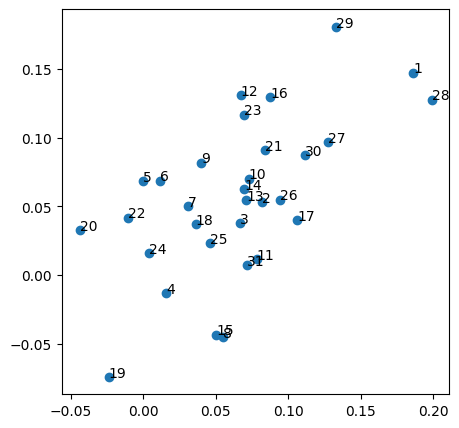

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(embeddings_day_month[:,0], embeddings_day_month[:,1], "o")
nombres = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21", "22", "23", "24", "25","26", "27","28","29","30","31" ]
for coords,nombre in zip(embeddings_day_month,nombres):
  plt.text(coords[0],coords[1],nombre)

In [ ]:
def multistep(model, Xs): # el número de ventanas en Xs = número de días hacia delante que quiero predecir
  ventana_endogena = Xs["endogena"][:1].copy()
  salidas = []
  for i in range(len(Xs["open"])):
    z = model.predict( # predigo un solo día (día i)
        {
            "endogena": ventana_endogena,
            "mes": Xs["mes"][i:(i+1)],
            "dow": Xs["dow"][i:(i+1)],
            "day_month": Xs["day_month"][i:(i+1)],
            "open": Xs["open"][i:(i+1)],
            "promo": Xs["promo"][i:(i+1)],
            "schoolholiday": Xs["schoolholiday"][i:(i+1)],
            "sh_0": Xs["sh_0"][i:(i+1)],
            "sh_a": Xs["sh_a"][i:(i+1)],
            "sh_b": Xs["sh_b"][i:(i+1)],
            "sh_c": Xs["sh_c"][i:(i+1)],
            "is_weekend": Xs["is_weekend"][i:(i+1)],
            "Year_norm": Xs["Year_norm"][i:(i+1)]
        }, verbose=0
    )
    ventana_endogena[:-1] = ventana_endogena[1:] # desplazo un día la ventana
    ventana_endogena[-1]  = z[0][0] # predicción
    salidas.append(scaler.inverse_transform(z)[0,0])

  return salidas

In [ ]:
Xs_test["endogena"][0]

array([[0.34886205],
       [1.        ],
       [0.48319777],
       [0.33111495],
       [0.4850875 ],
       [0.41360611],
       [0.54391587]])

In [ ]:
Xs_test["endogena"][1]

array([[1.        ],
       [0.48319777],
       [0.33111495],
       [0.4850875 ],
       [0.41360611],
       [0.54391587],
       [0.23712103]])

In [ ]:
Xs_test["endogena"][0].shape

(7, 1)

In [ ]:
sal = multistep(model, Xs_test)

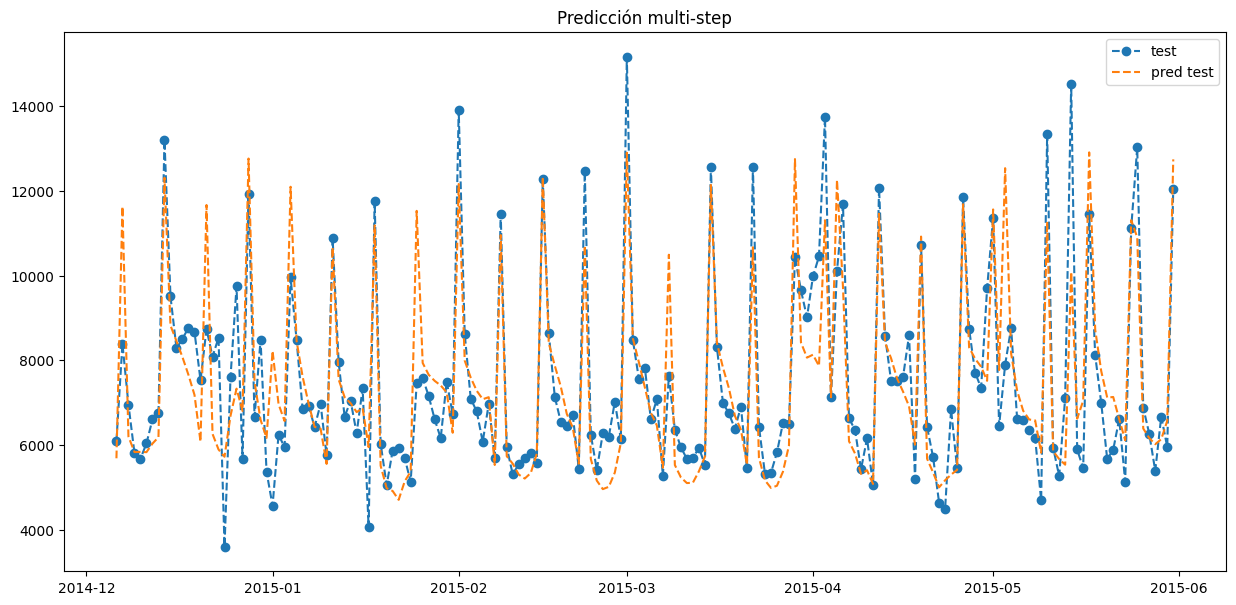

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(fechas_test, target_test, '--o', label="test")
plt.plot(fechas_test, sal, '--', label="pred test")
plt.legend()
plt.title("Predicción multi-step");

Calculamos el R2_score para multi-step

In [ ]:
R2_multi_step_14 = R2_score(target_test[:14], sal[:14])
R2_multi_step_14

0.6789140680895787

## Tabla de resultados

In [ ]:
# Inicializa la lista una sola vez antes del bucle (o ejecuciones sucesivas)

try:
    historial_resultados
except NameError:
    historial_resultados = []


historial_resultados.append({
    "R2_va": round(R2_va, 4),
    "R2_multi_step_14": round(R2_multi_step_14, 4),
    "R2_train": round(R2_tr, 4),
    "R2_test": round(R2_ts, 4),
    "R2_validation": round(R2_va, 4),
    "MSE_tr": round(MSE_tr, 4),
    "MSE_va": round(MSE_va, 4),
    "MSE_ts": round(MSE_ts, 4),
    "data_window": data_window,
    "dim_embedding": dim_embedding,
    "neurons_lstm": neurons_lstm,
    "l_r": l_r,
    "opt": opt.__class__.__name__,
    "batch_size": batch_size,
    "epochs": epochs
})

import pandas as pd
df_resultados = pd.DataFrame(historial_resultados)

display(df_resultados)


,R2_va,R2_multi_step_14,R2_train,R2_test,R2_validation,MSE_tr,MSE_va,MSE_ts,data_window,dim_embedding,neurons_lstm,l_r,opt,batch_size,epochs
0,0.8576,0.5275,0.7673,0.6374,0.8576,725214.4228,1.219391e+06,1.913896e+06,14,2,5,0.0005,RMSprop,32,250
1,0.8656,0.5621,0.7660,0.6565,0.8656,680066.4873,1.225937e+06,1.812757e+06,7,2,5,0.0005,RMSprop,32,250
2,0.8514,0.6789,0.7534,0.7145,0.8514,751717.2412,1.292020e+06,1.506914e+06,7,3,5,0.0005,RMSprop,32,250
3,0.8256,0.7333,0.7004,0.6877,0.8256,888283.5965,1.569589e+06,1.648314e+06,14,3,5,0.0005,RMSprop,32,250
4,0.8685,0.4861,0.7630,0.6473,0.8685,678226.1389,1.241817e+06,1.861155e+06,28,2,5,0.0005,RMSprop,32,250
5,0.8445,0.6847,0.6260,0.6995,0.8445,802179.6523,1.959878e+06,1.585880e+06,28,3,5,0.0005,RMSprop,32,250
6,0.8571,0.7050,0.7556,0.6728,0.8571,722848.5521,1.280672e+06,1.726754e+06,7,2,10,0.0005,RMSprop,32,250
7,0.9235,0.4868,0.7377,0.4030,0.9235,386912.9227,1.374217e+06,3.150949e+06,7,3,10,0.0005,RMSprop,32,250
8,0.8336,0.7056,0.7694,0.6708,0.8336,847546.8593,1.208532e+06,1.737222e+06,14,2,10,0.0005,RMSprop,32,250
9,0.8999,0.5426,0.7577,0.5620,0.8999,510039.6381,1.269389e+06,2.311675e+06,14,3,10,0.0005,RMSprop,32,250


In [ ]:

df_resultados.to_csv("/content/drive/MyDrive/PC4/data/resultados_modelosT2.csv", index=False)

A continuación después de varias iteraciones cambiando los hiperparametros:
  

*  data_window (contexto del información de la ventada de entrada a la lstm)
*  dim_embedding (características de información de tiempo vs Sales)
*  batch_size
*  neuronas para la res lstm

Se obtuvo la siguiente tabla...

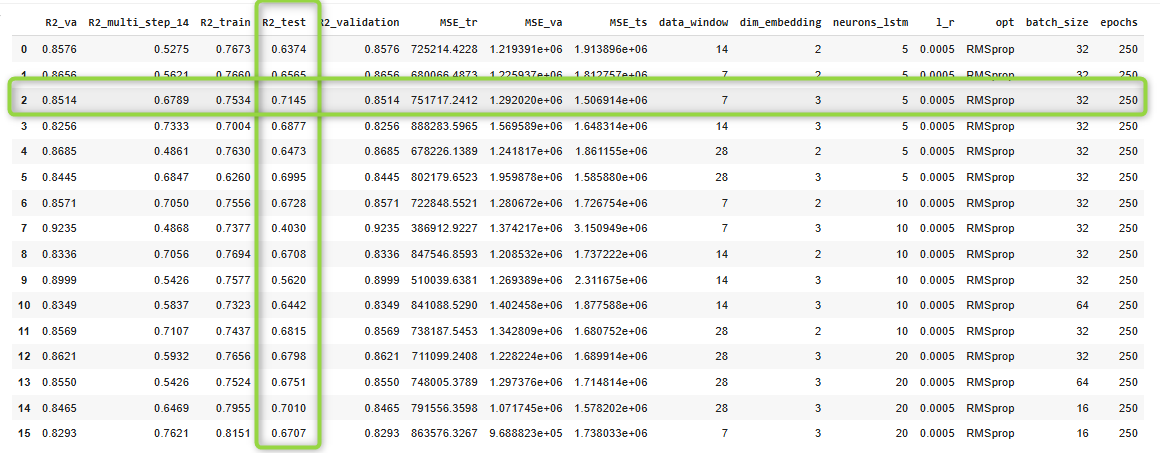

Con esos hiperparámetros la curva de entrenamiento tenía esta forma

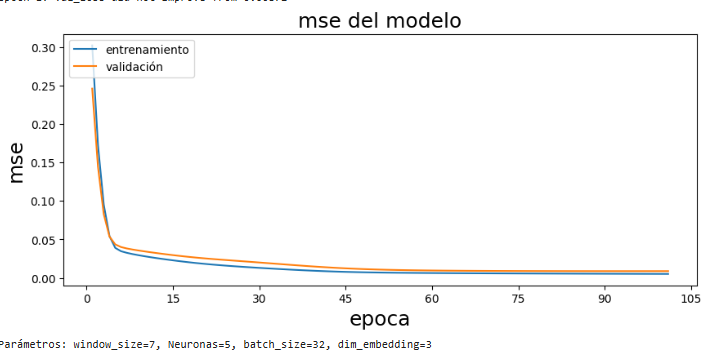

Aspecto	Observación	Evaluación
* Inicio	El error inicial (época 0) es alto (~0.3), como es común.	✅ Normal
* Descenso inicial	Caída rápida y sincronizada de ambas curvas durante las primeras 15–20 épocas.	✅ Muy bueno
* Estabilización	Desde época 30 hasta 105, ambas curvas descienden suave y de forma casi paralela.	✅ Ideal
* Divergencia	Prácticamente nula. Las curvas se mantienen juntas.	✅ Excelente
* Overfitting	No hay signos claros de sobreajuste, incluso tras 100 épocas.	✅
* MSE final (val)	MSE de validación queda cerca de 0.01.
* Capacidad del modelo	Modelo con pocas neuronas (5), pero logra curva estable.